
## Car Price Prediction
This notebook demonstrates a comprehensive approach to predicting car prices using machine learning techniques. 

### Objectives
1. Explore and preprocess the dataset.
2. Perform exploratory data analysis (EDA).
3. Build and evaluate machine learning models for predicting car prices.

#### Steps Covered:
- Data Loading and Inspection
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Model Training and Evaluation

---


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1. Loading DataSet

In [2]:
# read from csv file using pandas
df = pd.read_csv("../data/Cars.csv")

# print the first 4 rows of dataframe
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [3]:
# shape of our data (rows, columns)
df.shape

(8128, 13)

In [4]:
# inspect types of columns and oher infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# describes the statistics of the int/real numbers
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
### Here we have five values of owner, we convert them to 1 to 5 with
### First Owner as 1, Second as 2 ans so on manually since LabelEncoder is not that flexible to do so.

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df["owner"] = df["owner"].map(owner_mapping)

In [7]:
# original fuel columns and its contents
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
# Removing rows with fuel LPG or CNG.
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [9]:
# Striping kmpl from mileage and converting it into float
df['mileage'] = df['mileage'].astype(str).str.replace('kmpl', '').str.strip().astype(float)
df["mileage"].head(5)

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [10]:
# Removing CC from engine column and converting to float.
df['engine'] = df['engine'].astype(str).str.replace('CC', '').str.strip().astype(float)
df["engine"].head(5)

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [11]:
# replacing bhp from max power
df['max_power'] = df['max_power'].astype(str).str.replace('bhp', '').str.strip().astype(float)
df["max_power"].head(5)

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [12]:
# Only taking first name of the brand by splitting the name..

print(df['name'].unique())
df['name'] = df['name'].astype(str).str.split(' ').str[0]
print("----------------------------------------------------------")
print(df['name'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
----------------------------------------------------------
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [13]:
## dropping torque column
## ignoring errors as repeated action will cause column not found error
df = df.drop(columns=['torque'], errors='ignore')
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [14]:
# Test Drive Cars are ridiculously expensive. Since we do not want to
# involve this, we will simply delete all samples related to it.
print(df["owner"].unique())
df = df[~df['owner'].isin(['Test Drive Car'])]
df["owner"].unique()

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

#### Label Encoding

The objects datatypes cannot be modeled so we have to convert them to some numerical equivalents. For that we are using LabelEncoder by sklearn.

In [15]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["transmission", "fuel", "seller_type"]

for feat in features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])

df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0


In [16]:
one_hot_name = pd.get_dummies(df['name'], prefix='name')

# Combining with original.
df = pd.concat([df, one_hot_name], axis=1)
df = df.drop(columns=['name'])
df.head(4)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,name_Mitsubishi,name_Nissan,name_Opel,name_Peugeot,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,...,False,False,False,False,False,False,False,False,False,False


#### 2. Exploratory Data Analysis (EDA)
EDA provides us with necessary information before using the data or using it for in-depth analysis through visualization, statistical analysis, variable analysis, etc.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8033 non-null   int64  
 1   selling_price       8033 non-null   int64  
 2   km_driven           8033 non-null   int64  
 3   fuel                8033 non-null   int64  
 4   seller_type         8033 non-null   int64  
 5   transmission        8033 non-null   int64  
 6   owner               8033 non-null   int64  
 7   mileage             7819 non-null   float64
 8   engine              7819 non-null   float64
 9   max_power           7825 non-null   float64
 10  seats               7819 non-null   float64
 11  name_Ambassador     8033 non-null   bool   
 12  name_Ashok          8033 non-null   bool   
 13  name_Audi           8033 non-null   bool   
 14  name_BMW            8033 non-null   bool   
 15  name_Chevrolet      8033 non-null   bool   
 16  name_Daewoo

In [18]:
df.isna().sum()

year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage               214
engine                214
max_power             208
seats                 214
name_Ambassador         0
name_Ashok              0
name_Audi               0
name_BMW                0
name_Chevrolet          0
name_Daewoo             0
name_Datsun             0
name_Fiat               0
name_Force              0
name_Ford               0
name_Honda              0
name_Hyundai            0
name_Isuzu              0
name_Jaguar             0
name_Jeep               0
name_Kia                0
name_Land               0
name_Lexus              0
name_MG                 0
name_Mahindra           0
name_Maruti             0
name_Mercedes-Benz      0
name_Mitsubishi         0
name_Nissan             0
name_Opel               0
name_Peugeot            0
name_Renault            0
name_Skoda  

#### 2.1 Uni Variate Analysis 

#### Histogram

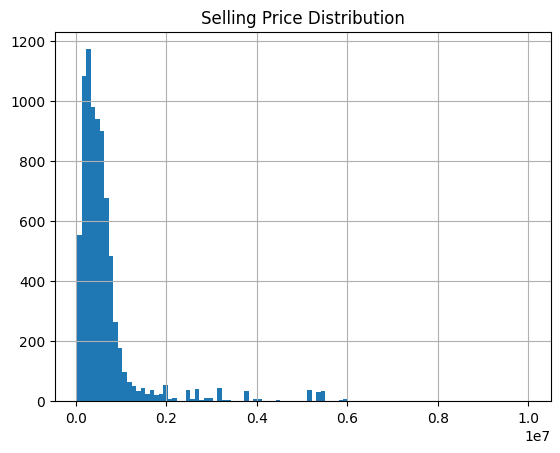

In [19]:
df['selling_price'].hist(bins=100)
plt.title('Selling Price Distribution')
plt.show()

#### Boxplot

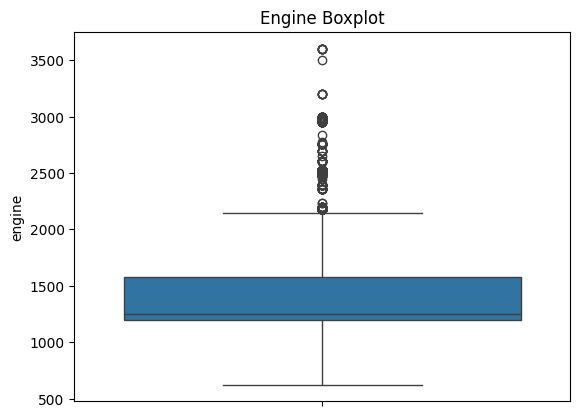

In [20]:
# using boxplot to identify any outliers
sns.boxplot((df['engine']))
plt.title('Engine Boxplot')
plt.show()


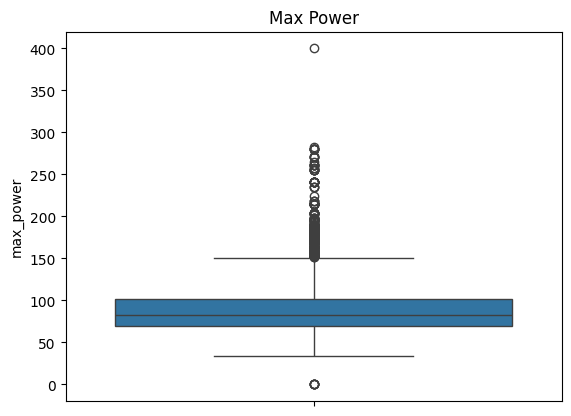

In [21]:
sns.boxplot((df['max_power']))
plt.title('Max Power')
plt.show()

#### Distribution plot

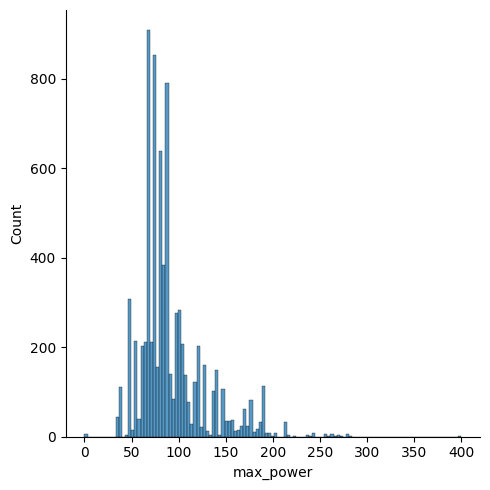

In [22]:
# gives us idea about the distribution of data
sns.displot(data = df, x = 'max_power')

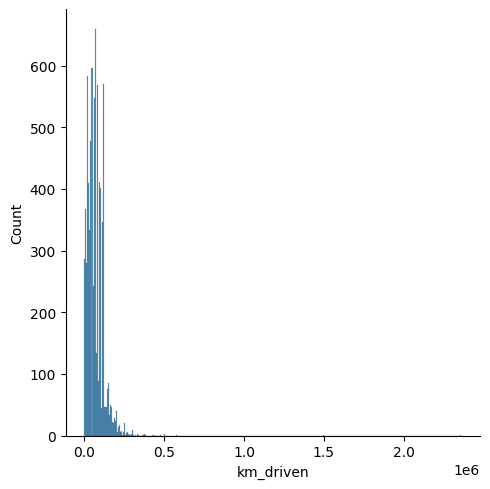

In [23]:
sns.displot(data = df, x = 'km_driven')

#### 2.2 Multi-variate Analysis

#### Boxplot

Text(0.5, 0, 'Selling Price')

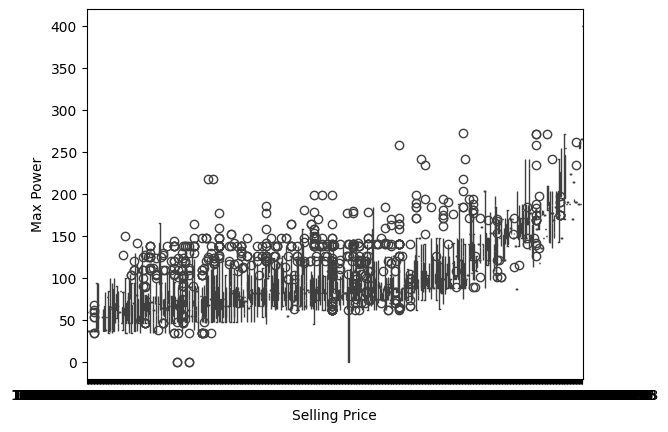

In [24]:
sns.boxplot(x = np.log(df["selling_price"]), y = df["max_power"]);
plt.ylabel("Max Power")
plt.xlabel("Selling Price")

#### Scatterplot

<Axes: xlabel='engine', ylabel='max_power'>

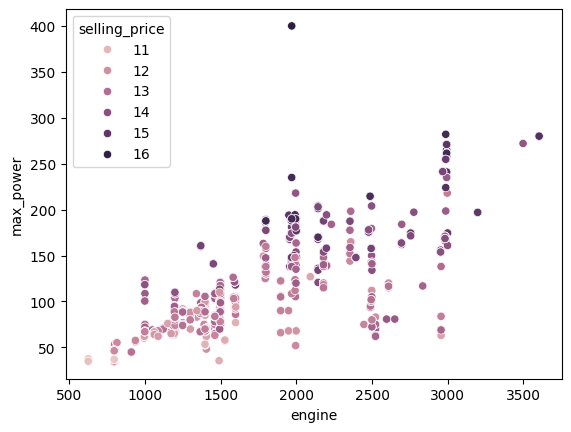

In [25]:
sns.scatterplot(x = df['engine'], y = df['max_power'], hue=(np.log(df['selling_price'])))

#### Correlation
It helps to find the relationship among the features, labels and helps us understanding the data more.It ranges from -1 to +1.

<Axes: >

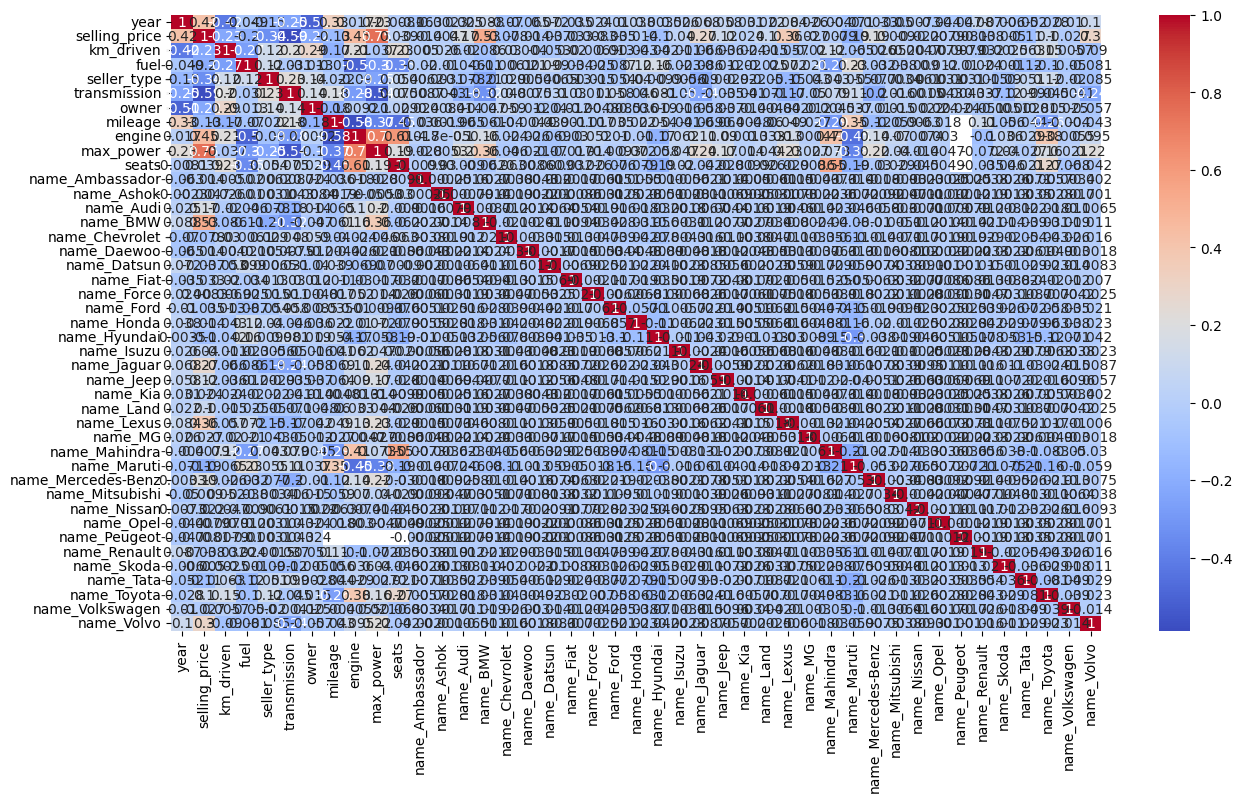

In [26]:
#correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### 3. Feature Selection
In this section, we select the features (columns) from our dataset which will be used to train the model. The selection of features depends on but not exclusive to factors like the correlations, statistics and also some other logics.

Some logics behind the feature selection:
- Features like `year` (manufacture date) and `max_power` will have impacts on `selling_price` even though their correlation seems moderate, picking these seems logical.
- Feature `name` seems logical to include as we know that in real life, a car will sell higher or lower based on the brand and model name.

In [27]:
# x is our features
# ignoring some feature like seller_type, transmission, owner and seats,
# as they dont seem that much important.
X = df.drop(columns=['selling_price'])

# y is selling price (to be predicted).

# Applying a log transformation to the 'selling_price' column to scale down its large values. 
# makes the distribution better and reduces the impact of outliers.

y = np.log(df['selling_price'])
X.shape, y.shape

((8033, 42), (8033,))

#### Train Test Split
The dataset is splitted into a ratio of training and testing set with the ratio varying according to the number of samples in the dataset. The most common train-test spiit are 90/10, 80/20 and 70/30.

In [28]:
# Spliting into 20% test adn 80% test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

#### 4. Preprocessing 

In [29]:
# checking for null, missing values in training set.
X_train.isna().sum()

year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage               171
engine                171
max_power             167
seats                 171
name_Ambassador         0
name_Ashok              0
name_Audi               0
name_BMW                0
name_Chevrolet          0
name_Daewoo             0
name_Datsun             0
name_Fiat               0
name_Force              0
name_Ford               0
name_Honda              0
name_Hyundai            0
name_Isuzu              0
name_Jaguar             0
name_Jeep               0
name_Kia                0
name_Land               0
name_Lexus              0
name_MG                 0
name_Mahindra           0
name_Maruti             0
name_Mercedes-Benz      0
name_Mitsubishi         0
name_Nissan             0
name_Opel               0
name_Peugeot            0
name_Renault            0
name_Skoda              0
name_Tata   

In [30]:
# checking for null, missing values in test set.
X_test.isnull().sum()

year                   0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage               43
engine                43
max_power             41
seats                 43
name_Ambassador        0
name_Ashok             0
name_Audi              0
name_BMW               0
name_Chevrolet         0
name_Daewoo            0
name_Datsun            0
name_Fiat              0
name_Force             0
name_Ford              0
name_Honda             0
name_Hyundai           0
name_Isuzu             0
name_Jaguar            0
name_Jeep              0
name_Kia               0
name_Land              0
name_Lexus             0
name_MG                0
name_Mahindra          0
name_Maruti            0
name_Mercedes-Benz     0
name_Mitsubishi        0
name_Nissan            0
name_Opel              0
name_Peugeot           0
name_Renault           0
name_Skoda             0
name_Tata              0
name_Toyota            0


#### Handling Null and Missing Values
Lets check for the skewness of the features mileage, engine and maxpower using histplot and use scipy to confirm it.   

<Axes: xlabel='engine', ylabel='Count'>

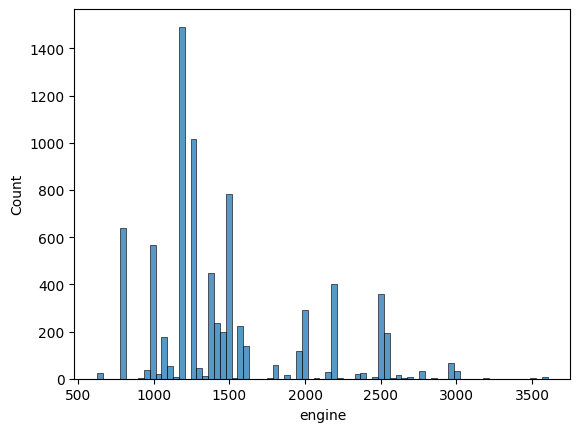

In [31]:
sns.histplot(data=df, x='engine')

The distribution of the feature `engine` looks right skewed. Lets confirm it by using scipy.stats

In [32]:
from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness of ENGINE: {skewness}")

Skewness of ENGINE: 1.1243926530777832


<Axes: xlabel='mileage', ylabel='Count'>

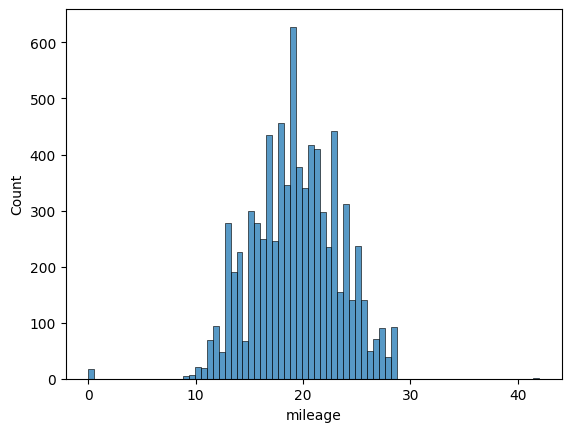

In [33]:
sns.histplot(data=df, x='mileage')

In [34]:
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness of MILEAGE: {skewness}")

# the distribution shows only a slight skewness or almost close to normal distribution.
# So replacing with mean or median really doesnt matter here.

Skewness of MILEAGE: -0.17239599936216496


<Axes: xlabel='max_power', ylabel='Count'>

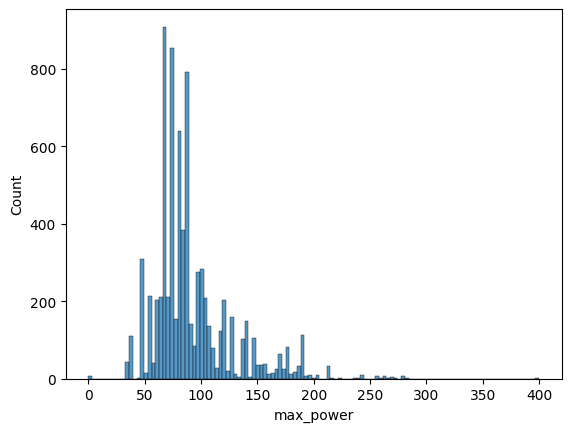

In [35]:
sns.histplot(data=df, x='max_power')

In [36]:
from scipy.stats import skew

skewness = skew(df['max_power'].dropna())
print(f"Skewness of MAX_POWER: {skewness}")

# the distribution shows a huge skewness.
# so missing na values must be replaced with median for max_power

Skewness of MAX_POWER: 1.6167922787880433


Skewness of SEATS: 1.9566021217105924


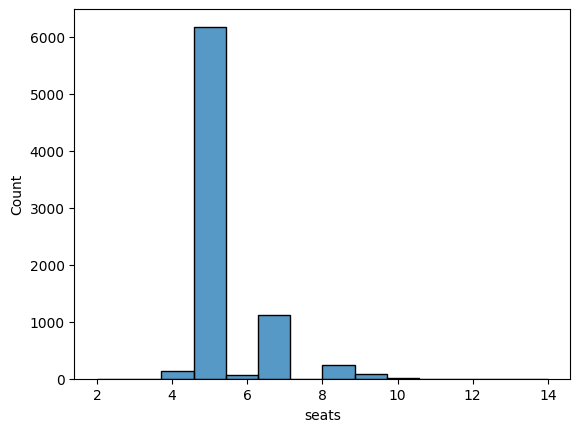

In [37]:
sns.histplot(data=df, x='seats')

skewness = skew(df['seats'].dropna())
print(f"Skewness of SEATS: {skewness}")


In [38]:
## mileage seems to have a close to a normal distribution. so replace NA values with Mean.
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


## these features seem to have a skewed distribution. So replace NA with Median.
skewed_features = ["engine", "max_power", "seats"]
for _feat in skewed_features:
    X_train[_feat].fillna(X_train[_feat].median(), inplace=True)

In [39]:
#Filling test set with the training distribution.

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

skewed_features_test = ["engine", "max_power", "seats"]
for _feat in skewed_features_test:
    X_test[_feat].fillna(X_train[_feat].median(), inplace=True)

In [40]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [41]:
# Make sure all values dont have missing or NA values
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage               0
engine                0
max_power             0
seats                 0
name_Ambassador       0
name_Ashok            0
name_Audi             0
name_BMW              0
name_Chevrolet        0
name_Daewoo           0
name_Datsun           0
name_Fiat             0
name_Force            0
name_Ford             0
name_Honda            0
name_Hyundai          0
name_Isuzu            0
name_Jaguar           0
name_Jeep             0
name_Kia              0
name_Land             0
name_Lexus            0
name_MG               0
name_Mahindra         0
name_Maruti           0
name_Mercedes-Benz    0
name_Mitsubishi       0
name_Nissan           0
name_Opel             0
name_Peugeot          0
name_Renault          0
name_Skoda            0
name_Tata             0
name_Toyota           0
name_Volkswagen       0
name_Volvo      

In [42]:
X_train.head(3)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,name_Mitsubishi,name_Nissan,name_Opel,name_Peugeot,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
3791,2013,56315,0,1,1,1,25.44,936.0,57.60,5.0,...,False,False,False,False,False,False,False,False,False,False
2110,2016,110000,0,1,1,1,23.20,1248.0,73.94,5.0,...,False,False,False,False,False,False,False,False,False,False
1791,2015,57000,0,1,1,2,15.40,1997.0,120.00,7.0,...,False,False,False,False,False,False,False,False,False,False


#### Outliers Detection

Lets detect the outliers in the features so that we can do something with them that will help to remove them or adjust them accordingly. 

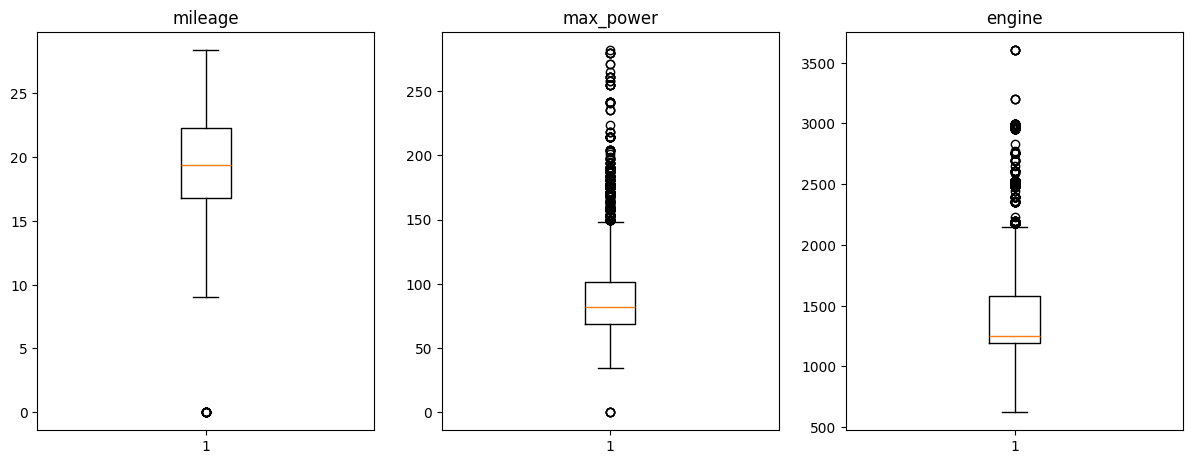

In [43]:
# Create a dictionary of columns.
col_dict = {'mileage':1,'max_power':2, 'engine': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [44]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [45]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    if not str(col).startswith("name"):
        bounds = []
        bounds = outlier_count(col)
        if len(bounds) == 0:
            continue
    
        X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------year---------------

Number of outliers: 60
Percent of data that is outlier: 0.93%

---------------km_driven---------------

Number of outliers: 141
Percent of data that is outlier: 2.19%

---------------seller_type---------------

Number of outliers: 1090
Percent of data that is outlier: 16.96%

---------------transmission---------------

Number of outliers: 825
Percent of data that is outlier: 12.84%

---------------owner---------------

Number of outliers: 138
Percent of data that is outlier: 2.15%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.23%

---------------engine---------------

Number of outliers: 942
Percent of data that is outlier: 14.66%

---------------max_power---------------

Number of outliers: 486
Percent of data that is outlier: 7.56%

---------------seats---------------

Number of outliers: 1296
Percent of data that is outlier: 20.17%


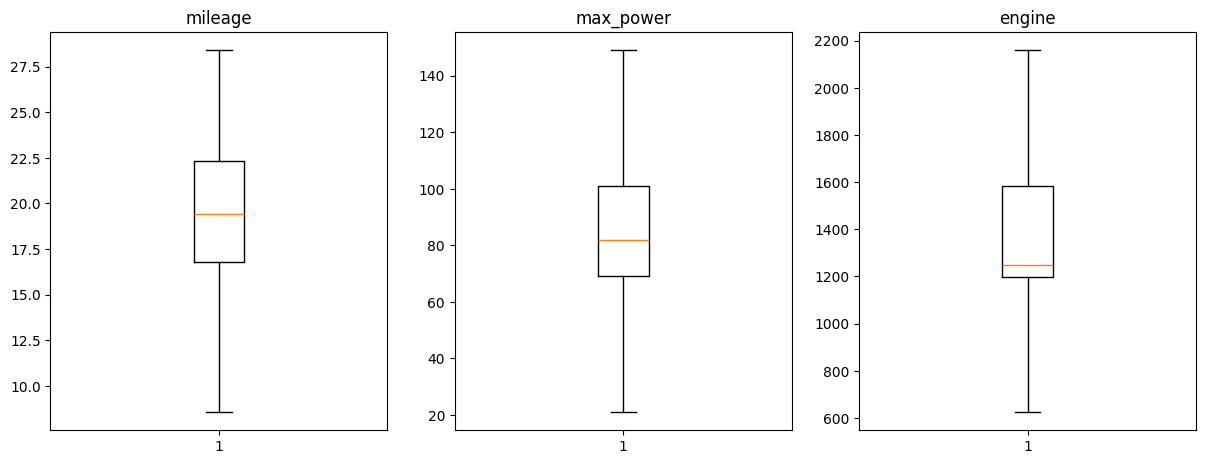

In [46]:
# Check for outliers again.
col_dict = {'mileage':1,'max_power':2, 'engine': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

#### Scaling
Standardizing the features using StandardScaler. This scales the data to have a mean of 0 and a standard deviation of 1, which is essential for algorithms that are sensitive to the magnitude of features.

In [47]:
# scaling helps in convergence faster. so 
# using standard scalar to scale our train test data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

In [48]:
# Save the scaler model for later use in website

import joblib
joblib.dump(ss, "../app/model/scaler.pkl")

['../app/model/scaler.pkl']

#### 5. Model Selection
Using three algorithms namely Linear Regression, Random Forest Regressor and SVR. But the model will be made with the best one only.

In [67]:
import mlflow
import math
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def _initialize_xavier_weights(self, no_of_samples: int):
        # calculate the range for the weights
        lower , upper = -(1.0 / math.sqrt(no_of_samples)), (1.0 / math.sqrt(no_of_samples))
        # summarize the range
        # print (lower , upper )
        # you need to basically randomly pick weights within this range
        # generate random numbers
        numbers = np.random.uniform(lower, upper)
        scaled = lower + numbers * ( upper - lower )
        return scaled
    
    def _compute_r2_score(self):
        return 1.0

    def _initialize_zero_weights(self):
        pass

In [68]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

In [69]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [70]:
X_train = np.array(X_train)
y_train = np.array(y_train)


In [71]:
regs = ["Ridge", "Lasso", "ElasticNet"]

for reg in regs:

    params = {"method": "batch", "lr": 0.1, "l": 0.1}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5)

    # #######
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)

    print("Test MSE: ", mse)
    mlflow.log_metric(key="test_mse", value=mse)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # #######

    mlflow.end_run()

===== Ridge =====
Fold 0: 169.59429831551628
Fold 1: 177.80689235474458
Fold 2: 172.25244284141564
Test MSE:  168.08510062988967
===== Lasso =====
Fold 0: 168.821597955036
Fold 1: 327.5290035308663
Fold 2: 169.60853284820772
Test MSE:  167.9202240857879
===== ElasticNet =====
Fold 0: 169.21031260959563
Fold 1: 218.82728514120814
Fold 2: 183.44105137057008
Test MSE:  167.46444578621987


In [52]:
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR

# from sklearn.ensemble import RandomForestRegressor

# # models that we will be using, put them in a list
# algorithms = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators = 100, random_state = 66)]

# # The names of the models
# algorithm_names = ["Linear Regression", "SVR", "Random-Forest Regressor"]

#### Cross Validation with K-fold

The dataset is divided into K subsets of approx. equal size.The model is trained on K−1 folds and tested on the remaining fold. This process is repeated K times, each time using a different fold as the test set.The overall performance is evaluated by averaging the metric such as mse, r2, etc across all K folds.

In [53]:
# from sklearn.model_selection import KFold, cross_val_score

# #lists for keeping mse
# train_mse = []
# test_mse = []

# #defining splits
# kfold = KFold(n_splits=5, shuffle=True)

# for i, model in enumerate(algorithms):
#     scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
#     print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Random forest edges out from the rest. So we can now use Grid Search to fine-tune the hyper parameters. Basically it is a exhaustive search among all the given parameters that finds out the best combination of parameters.

In [54]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'bootstrap': [True], 'max_depth': [5, 10, 15, 20, 25, None],
#               'n_estimators': [5, 8, 12, 15, 20, 25, 30]}

# rf = RandomForestRegressor(random_state = 21)

# grid = GridSearchCV(estimator = rf, 
#                     param_grid = param_grid, 
#                     cv = kfold, 
#                     n_jobs = -1, 
#                     return_train_score=True, 
#                     refit=True,
#                     scoring='neg_mean_squared_error')

# grid.fit(X_train, y_train)

In [55]:
# best combination of parameters
# grid.best_params_

In [56]:
# # best score of grid search
# best_mse = grid.best_score_
# best_mse

#### 6. Testing

So now we got our grid search and found the best model, lets test mse and r2 score of the model.

In [57]:
# from sklearn.metrics import mean_squared_error, r2_score

# yhat = grid.predict(X_test)
# print("MSE is", mean_squared_error(y_test, yhat))

# print("R2 score is", r2_score(y_test, yhat))

#### Error distribution
Below is the actual vs predicted values and its distribution. The figure shows mostly the distribution centered around zero with a narrow spread.

In [58]:
# errors = y_test - yhat

# # Plotting errors
# plt.figure(figsize=(10, 6))

# # Plotting error distribution
# plt.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
# plt.xlabel('Error')
# plt.ylabel('Frequency')
# plt.title('Error Distribution (Actual - Predicted)')
# plt.show()

#### 7. Analysis: Feature Importance
Analysis about the degree of importance of a particular feature. It ranges from 0 to 1. Higher the number, the more that feature impacts the prediction.

In [59]:
rf = grid.best_estimator_

rf.feature_importances_

NameError: name 'grid' is not defined

<BarContainer object of 42 artists>

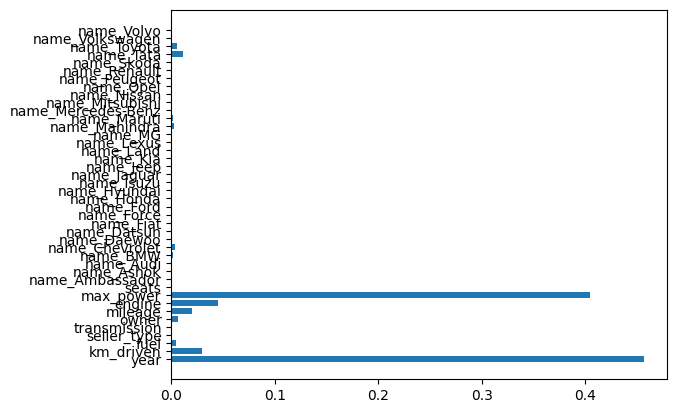

In [57]:
plt.barh(X.columns, rf.feature_importances_)

Clearly from the above plot, we can see that feature `max_power`, `year`, `engine` dominates the importance and hence the model heavily relies on these values. 

Text(0.5, 0, 'Random Forest Feature Importance')

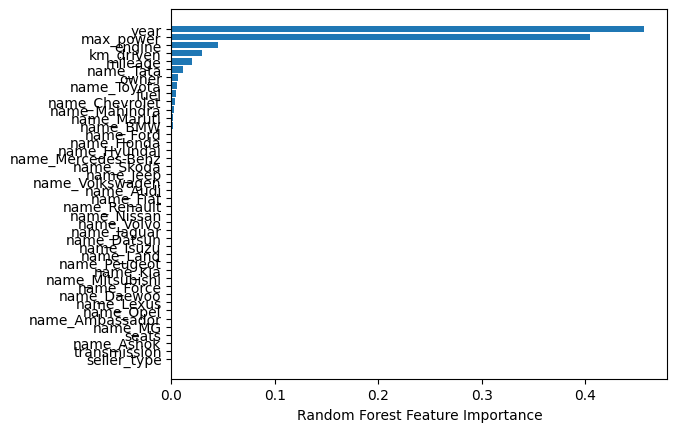

In [58]:
# Sorting using feature impotance
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### 8. Inference
To provide inference service or deploy, it's best to save the model for latter use.

In [59]:
import joblib

# save the model to disk
filename = '../app/model/car_price_predictor'
joblib.dump(grid, filename)

['../app/model/car_price_predictor']

Using the saved model to predict.

In [60]:
# load the model from disk
loaded_model = joblib.load(filename)

#### Implementation

`Scenario 1: Relatively New Audi Car`
- Engine : 1396 CC
- Max Power: 748 bhp
- Manufactured Year: 2018
- Km_driven: 12000 km
- Name: Audi
- Mileage: 17 kmpl

Here we can see that this car has great engine and max_power and is of brand `Audi` with a good mileage and bought recently. As all the criterias seems very good, it seems logical that we assume this will have a high selling price.

In [61]:
test1 = pd.DataFrame([[2, 2018, 12000, 17 ,1396, 748]],
                         columns=['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power'])

`Scenario 2: Old Maruti Car`
- Engine : 748 CC
- Max Power: 72 bhp
- Manufactured Year: 2010
- Km_driven: 145500 km
- Name: Maruti
- Mileage: 17 kmpl

Here we can see that this car has good engine and max_power is just 72 bhp which is just okish,  and is of brand `Maruti` with a good mileage and bought in 2010. The characteristics seems very iffy and the selling price can be assumed to be low. Lets see how the model predicts this one.

In [62]:
test2 = pd.DataFrame([[15, 2010, 145500, 17, 748, 72]],
                         columns=['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power'])

Since our model is trained on the scaled data we need to scale the test dataset as well to get more accurate predictions.

Also, We have to use np.exp() to look at the predicted selling price as they are transformed values using logarithmic function.

In [63]:
scaler_fit_model = joblib.load("../app/model/scaler.pkl")

# since our model is trained by scaling the features, need to do it here as well.
final_data_1 = scaler_fit_model.transform(test1)
final_data_2 = scaler_fit_model.transform(test2)

sample_1 = loaded_model.predict(final_data_1)
sample_2 = loaded_model.predict(final_data_2)

print("Predicted price of Sample 1 car:", np.exp(sample_1[0]))
print("Predicted price of Sample 2 car:", np.exp(sample_2[0]))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- name
Feature names seen at fit time, yet now missing:
- fuel
- name_Ambassador
- name_Ashok
- name_Audi
- name_BMW
- ...


As assumed by us beforehand, the predicted price of sample 1:new audi car is very high which seems reasonable. Also, the predicted price of sample 2:old maruti ver fairly low which also seems understandable.

### Analysis and Report

#### Which features significantly impact predictions, and which do not? Why?

According to the correlation heatmap, we can see that the features having the highest correlation with the selling_price are `year`, `max_power` and `engine`. They are highly correlated to the selling price which means that change in these feature impacts the selling_price. Also we can see that the features like seats and fuel doesnt have that much of the impact on the predictions.

- The feature `year` has 0.42 score in correlation with selling_price which means that when the year is higher (a newly manufactured car) tends to have a higher selling price.

- The feature `max_power` has 0.75 score in correlation with selling_price. So a car with higher horsepower is likely to be more expensive.

Other features like `transmission`, `fuel_type`, `seller_type` doesn't have that impact on the prediction because although they have some correlation with selling_price, because these features seems to be correlated with other features.
    
#### Which algorithms performed well, and which did not? Why?

After the analysis using three algorithms and metrics, the best performing algorithm was found to be `Random Forest`. We arrive at the conclusion because it has highest R^2 i.e `0.93` with the least mse of `0.049`.

`Random forest` algorithm performed better than both Linear Regression and SVR Regression according to our analysis. During the analysis, we found out that our features had multiple outliers, there were also some sparse datas, there were noises in the dataset and there might have been some non-lineraity between the features. Since random forest is a tree based model with an inherent feature selections mechanisms, it tends to perform better than Linear models with those datas. So it is very obvious that random forest outperformed both Linear Regression and SVR.

Both Linear regression and SVR tends to perform well when there is a linear or nearly a linear relationship between the features. Also both algorithms cannot handle sparse datas properly. So these algorithms could perform as well as the random forest.